## Analiza Danych Sprzedażowych

## Import

In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar


## Wczytanie danych

In [346]:
df = pd.read_csv('./sales_data_sample.csv', encoding='latin1')

df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Eksploracja danych

In [347]:
df.columns = [col.lower() for col in df.columns]
df

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [348]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ordernumber,2823.0,10258.725115,92.085478,10100.00,10180.00,10262.0,10333.5,10425.0
quantityordered,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
priceeach,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
orderlinenumber,2823.0,6.466171,4.225841,1.00,3.00,6.0,9.0,18.0
sales,2823.0,3553.889072,1841.865106,482.13,2203.43,3184.8,4508.0,14082.8
qtr_id,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
month_id,2823.0,7.092455,3.656633,1.00,4.00,8.0,11.0,12.0
year_id,2823.0,2003.815090,0.699670,2003.00,2003.00,2004.0,2004.0,2005.0
msrp,2823.0,100.715551,40.187912,33.00,68.00,99.0,124.0,214.0


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      302 non-null    object 


In [350]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize'],
      dtype='object')

In [351]:
df[['year_id']].isnull().sum()

year_id    0
dtype: int64

In [352]:
df[['month_id']].isnull().sum()

month_id    0
dtype: int64

In [353]:
df.dtypes

ordernumber           int64
quantityordered       int64
priceeach           float64
orderlinenumber       int64
sales               float64
orderdate            object
status               object
qtr_id                int64
month_id              int64
year_id               int64
productline          object
msrp                  int64
productcode          object
customername         object
phone                object
addressline1         object
addressline2         object
city                 object
state                object
postalcode           object
country              object
territory            object
contactlastname      object
contactfirstname     object
dealsize             object
dtype: object

## Konwersja kolumny 'orderdate' oraz dodanie kolumn 'order_day' oraz 'order_month'

In [354]:
df['orderdate'] = pd.to_datetime(df['orderdate'])

In [355]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [356]:
df['order_day'] = df['orderdate'].dt.day_of_week

In [357]:
df['order_month'] = df['orderdate'].dt.month

In [358]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,order_day,order_month
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,0,2
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2,5
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1,7
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,0,8
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4,10


## Zadania: 
 - Jak wygląda miesięczna sprzedaż (ilościowa i wartościowa)? - done

 - Jaki był średni przychód na jedno zamówienie? - done

 - Jaki był średni przychód na jedną zamówioną sztukę? -done

 - Który miesiąc był najlepszy pod względem sprzedaży (ilościowo i wartościowo)? -done

 - Jak wygląda sprzedaż na wykresach: miesięczna ilościowa, wartościowa i porównanie średnich przychodów?

In [359]:
sales_per_month = df[['order_month', 'quantityordered']]
sales_per_month

,order_month,quantityordered
0,2,30
1,5,34
2,7,41
3,8,45
4,10,49
...,...,...
2818,12,20
2819,1,29
2820,3,43
2821,3,34


In [360]:
sales_per_month = sales_per_month.sort_values('order_month')
sales_per_month= sales_per_month.groupby('order_month').sum()

In [361]:
print(sales_per_month.columns)


Index(['quantityordered'], dtype='object')


In [362]:
sales_per_month = sales_per_month.reset_index()
sales_per_month = sales_per_month.rename(columns={'quantityordered': 'order_values'})
sales_per_month

,order_month,order_values
0,1,7997
1,2,7903
2,3,7585
3,4,6704
4,5,8992
5,6,4620
6,7,4899
7,8,6538
8,9,5681
9,10,10998


In [363]:
sales_per_month['order_values'].max()

np.int64(20857)

In [364]:
best_month = sales_per_month['order_values'] == sales_per_month['order_values'].max()
sales_per_month[best_month]

,order_month,order_values
10,11,20857


In [365]:
sales_per_month['order_month'] = sales_per_month['order_month'].apply(lambda x: calendar.month_name[x])
sales_per_month

,order_month,order_values
0,January,7997
1,February,7903
2,March,7585
3,April,6704
4,May,8992
5,June,4620
6,July,4899
7,August,6538
8,September,5681
9,October,10998


### Wykres

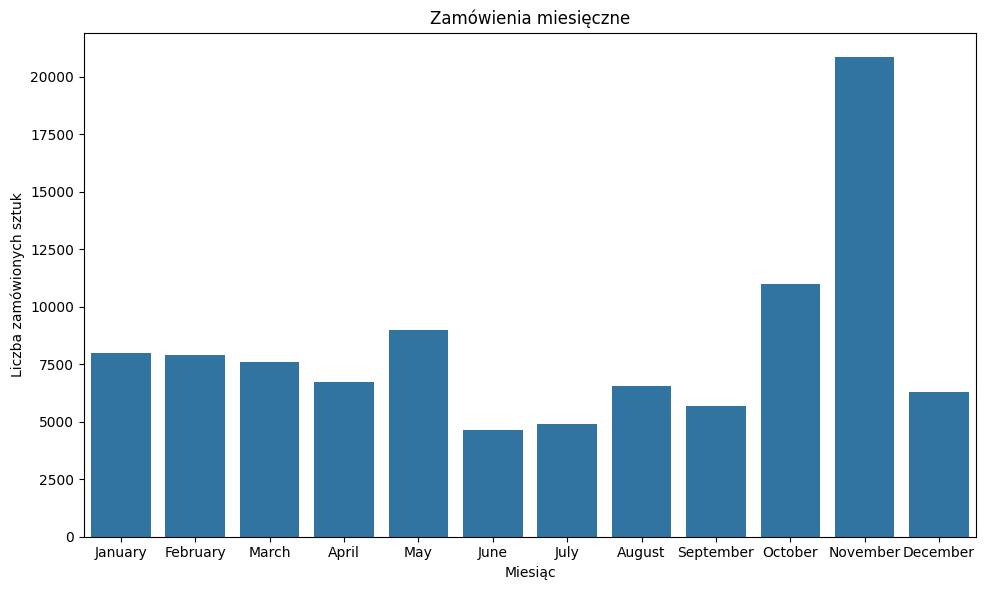

In [366]:
plt.figure(figsize=(10,6))
sns.barplot(data=sales_per_month, x= 'order_month', y= 'order_values')
plt.title('Zamówienia miesięczne')
plt.ylabel('Liczba zamówionych sztuk')
plt.xlabel('Miesiąc')
plt.tight_layout()
plt.show()

Najlepszy miesiąc to Listopad z poziomem sprzedaży na poziomie 20857 zamówień.

In [367]:
df.head()

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,order_day,order_month
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,0,2
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2,5
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,1,7
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,0,8
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,4,10


In [368]:
sum_ordered = df['quantityordered'].sum()
sum_sales = df['sales'].sum()

In [369]:
avg_per_unit = sum_sales/ sum_ordered 
avg_per_unit

np.float64(101.27114831376744)

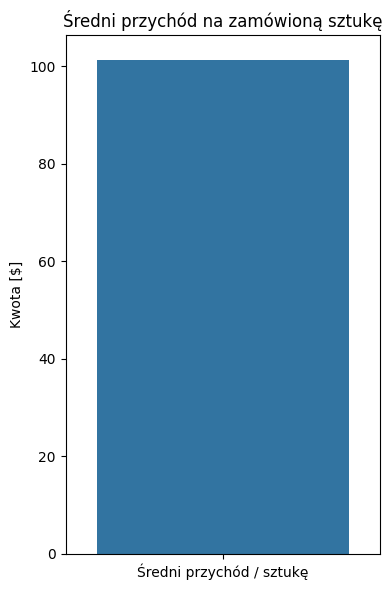

In [370]:
plt.figure(figsize=(4,6))
sns.barplot(x =["Średni przychód / sztukę"] ,y= [avg_per_unit])
plt.title('Średni przychód na zamówioną sztukę')
plt.ylabel('Kwota [$]')
plt.tight_layout()
plt.show()


Średni przychód na jedną sztukę wynosi 101.27$

In [371]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize', 'order_day', 'order_month'],
      dtype='object')

In [372]:
unique_ordered = df['ordernumber'].nunique()
avg_per_order = sum_sales/ unique_ordered
round(avg_per_order)

32680

Średni przychód na sztukę wynosi 32680 $

# Analiza klientów i rynków

## Zadania

1. Ilu unikalnych klientów znajduje się w danych?
2. Który klient wygenerował największy łączny obrót?
3. Stwórz ranking TOP 5 klientów wg całkowitej sprzedaży.
4. Jakie kraje wygenerowały najwyższy obrót?
5. Zrób wykres przedstawiający udział sprzedaży wg krajów. 
6. Sporządź podsumowanie tekstowe (wnioski):
   - Kto był najlepszym klientem?
   - Jak wygląda sprzedaż między krajami?
   - Czy sprzedaż jest skoncentrowana czy rozproszona?


### 1. Ilu unikalnych klientów znajduje się w danych?

In [373]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'addressline2', 'city', 'state', 'postalcode',
       'country', 'territory', 'contactlastname', 'contactfirstname',
       'dealsize', 'order_day', 'order_month'],
      dtype='object')

In [374]:
df['customername'].drop_duplicates().count()

np.int64(92)

Odp: W danych znajduje się 92 unikalnych klientów

### 2. Który klient wygenerował największy łączny obrót? 

In [375]:
sales_per_customer = (
    df.groupby('customername')['sales']
    .sum()
    .reset_index()
    .sort_values(by='sales',ascending = False)
)

In [376]:
sales_per_customer

,customername,sales
33,Euro Shopping Channel,912294.11
55,Mini Gifts Distributors Ltd.,654858.06
6,"Australian Collectors, Co.",200995.41
58,Muscle Machine Inc,197736.94
44,La Rochelle Gifts,180124.90
...,...,...
69,Royale Belge,33440.10
50,Microscale Inc.,33144.93
10,Auto-Moto Classics Inc.,26479.26
4,Atelier graphique,24179.96


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Euro Shopping Channel'),
  Text(1, 0, 'Mini Gifts Distributors Ltd.'),
  Text(2, 0, 'Australian Collectors, Co.'),
  Text(3, 0, 'Muscle Machine Inc'),
  Text(4, 0, 'La Rochelle Gifts'),
  Text(5, 0, 'Dragon Souveniers, Ltd.'),
  Text(6, 0, 'Land of Toys Inc.'),
  Text(7, 0, 'The Sharp Gifts Warehouse'),
  Text(8, 0, 'AV Stores, Co.'),
  Text(9, 0, "Anna's Decorations, Ltd"),
  Text(10, 0, 'Souveniers And Things Co.'),
  Text(11, 0, 'Corporate Gift Ideas Co.'),
  Text(12, 0, 'Salzburg Collectables'),
  Text(13, 0, 'Danish Wholesale Imports'),
  Text(14, 0, 'Saveley & Henriot, Co.'),
  Text(15, 0, "L'ordine Souveniers"),
  Text(16, 0, 'Rovelli Gifts'),
  Text(17, 0, 'Reims Collectables'),
  Text(18, 0, 'Scandinavian Gift Ideas'),
  Text(19, 0, 'Online Diecast Creations Co.')])

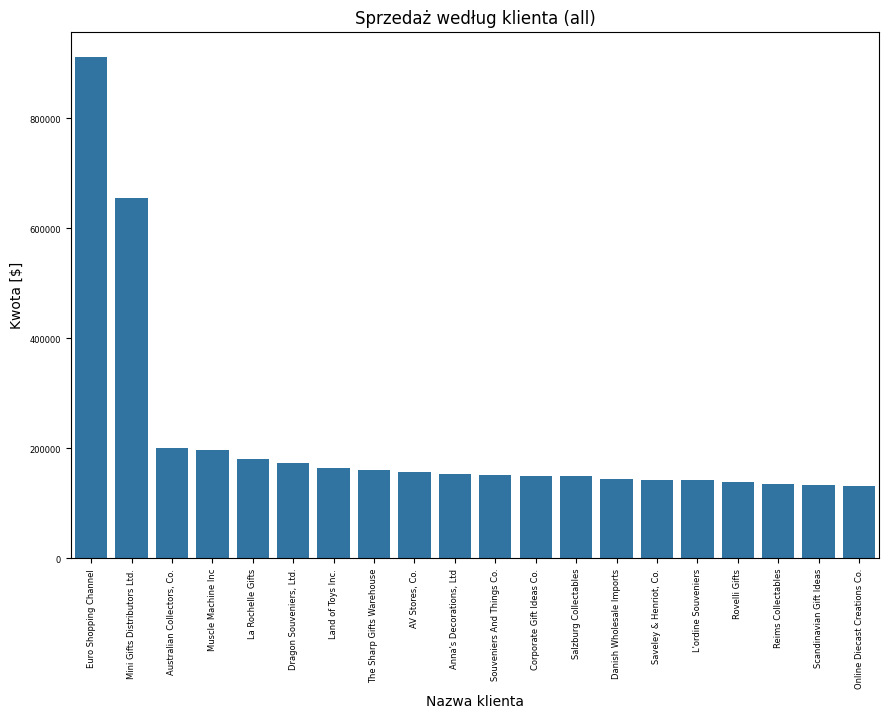

In [377]:
top_10 = sales_per_customer.head(10)

plt.figure(figsize=(10,6))
sns.barplot(data= top_20, x ='customername', y='sales' )
plt.tight_layout()
plt.title('Sprzedaż według klienta (all)')
plt.xlabel('Nazwa klienta')
plt.ylabel('Kwota [$]')
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)
plt.xticks(rotation=90, fontsize=6)



Odp: Największy obrót wygenerował Euro Shopping Channel z kwotą: 912294.11 $

### 3. Stwórz ranking TOP 5 klientów wg całkowitej sprzedaży.

C:\Users\adria\AppData\Local\Temp\ipykernel_65920\1361452157.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= top_5, x='customername', y= 'sales', palette='crest')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Euro Shopping Channel'),
  Text(1, 0, 'Mini Gifts Distributors Ltd.'),
  Text(2, 0, 'Australian Collectors, Co.'),
  Text(3, 0, 'Muscle Machine Inc'),
  Text(4, 0, 'La Rochelle Gifts')])

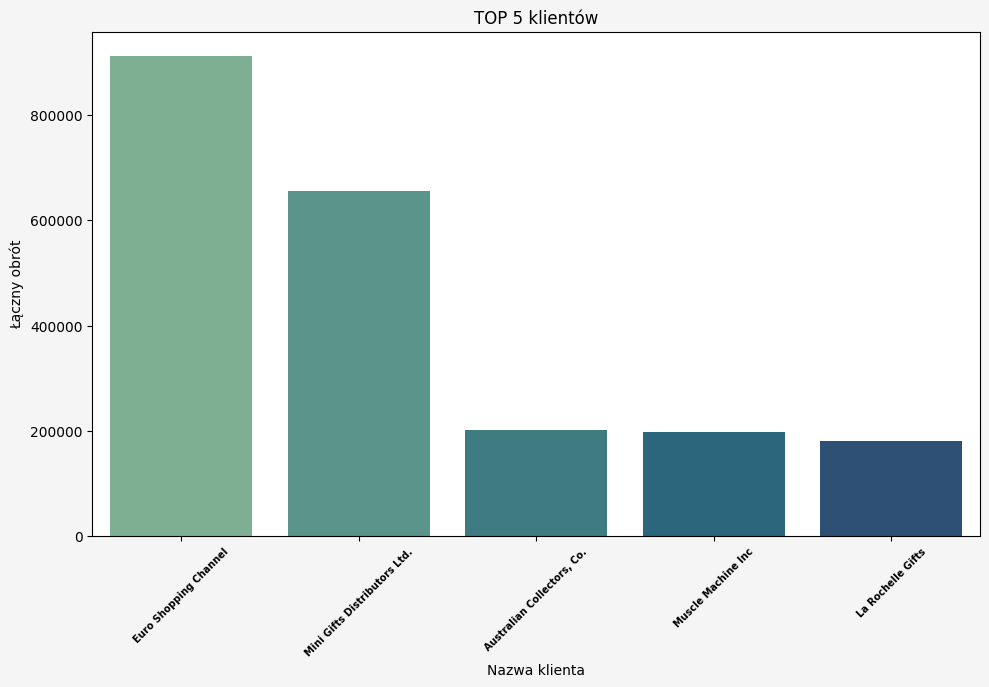

In [378]:
top_5 = sales_per_customer.head(5)

plt.figure(figsize=(10,6), facecolor='#f5f5f5')
sns.barplot(data= top_5, x='customername', y= 'sales', palette='crest')
plt.title('TOP 5 klientów')
plt.xlabel('Nazwa klienta')
plt.ylabel('Łączny obrót')
plt.tight_layout()
plt.xticks(rotation=45, fontsize=7, fontweight='bold')

### 4. Jakie kraje wygenerowały najwyższy obrót?

In [379]:
country_sales =(
    df.groupby('country')['sales']
    .sum()
    .reset_index()
    .sort_values('sales', ascending=False)
)

country_sales

,country,sales
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46
9,Italy,374674.31
5,Finland,329581.91
11,Norway,307463.70
13,Singapore,288488.41
4,Denmark,245637.15


C:\Users\adria\AppData\Local\Temp\ipykernel_65920\2988008800.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_sales, x = 'country', y = 'sales',palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Spain'),
  Text(2, 0, 'France'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'UK'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Finland'),
  Text(7, 0, 'Norway'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'Denmark'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Sweden'),
  Text(13, 0, 'Austria'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Switzerland'),
  Text(16, 0, 'Belgium'),
  Text(17, 0, 'Philippines'),
  Text(18, 0, 'Ireland')])

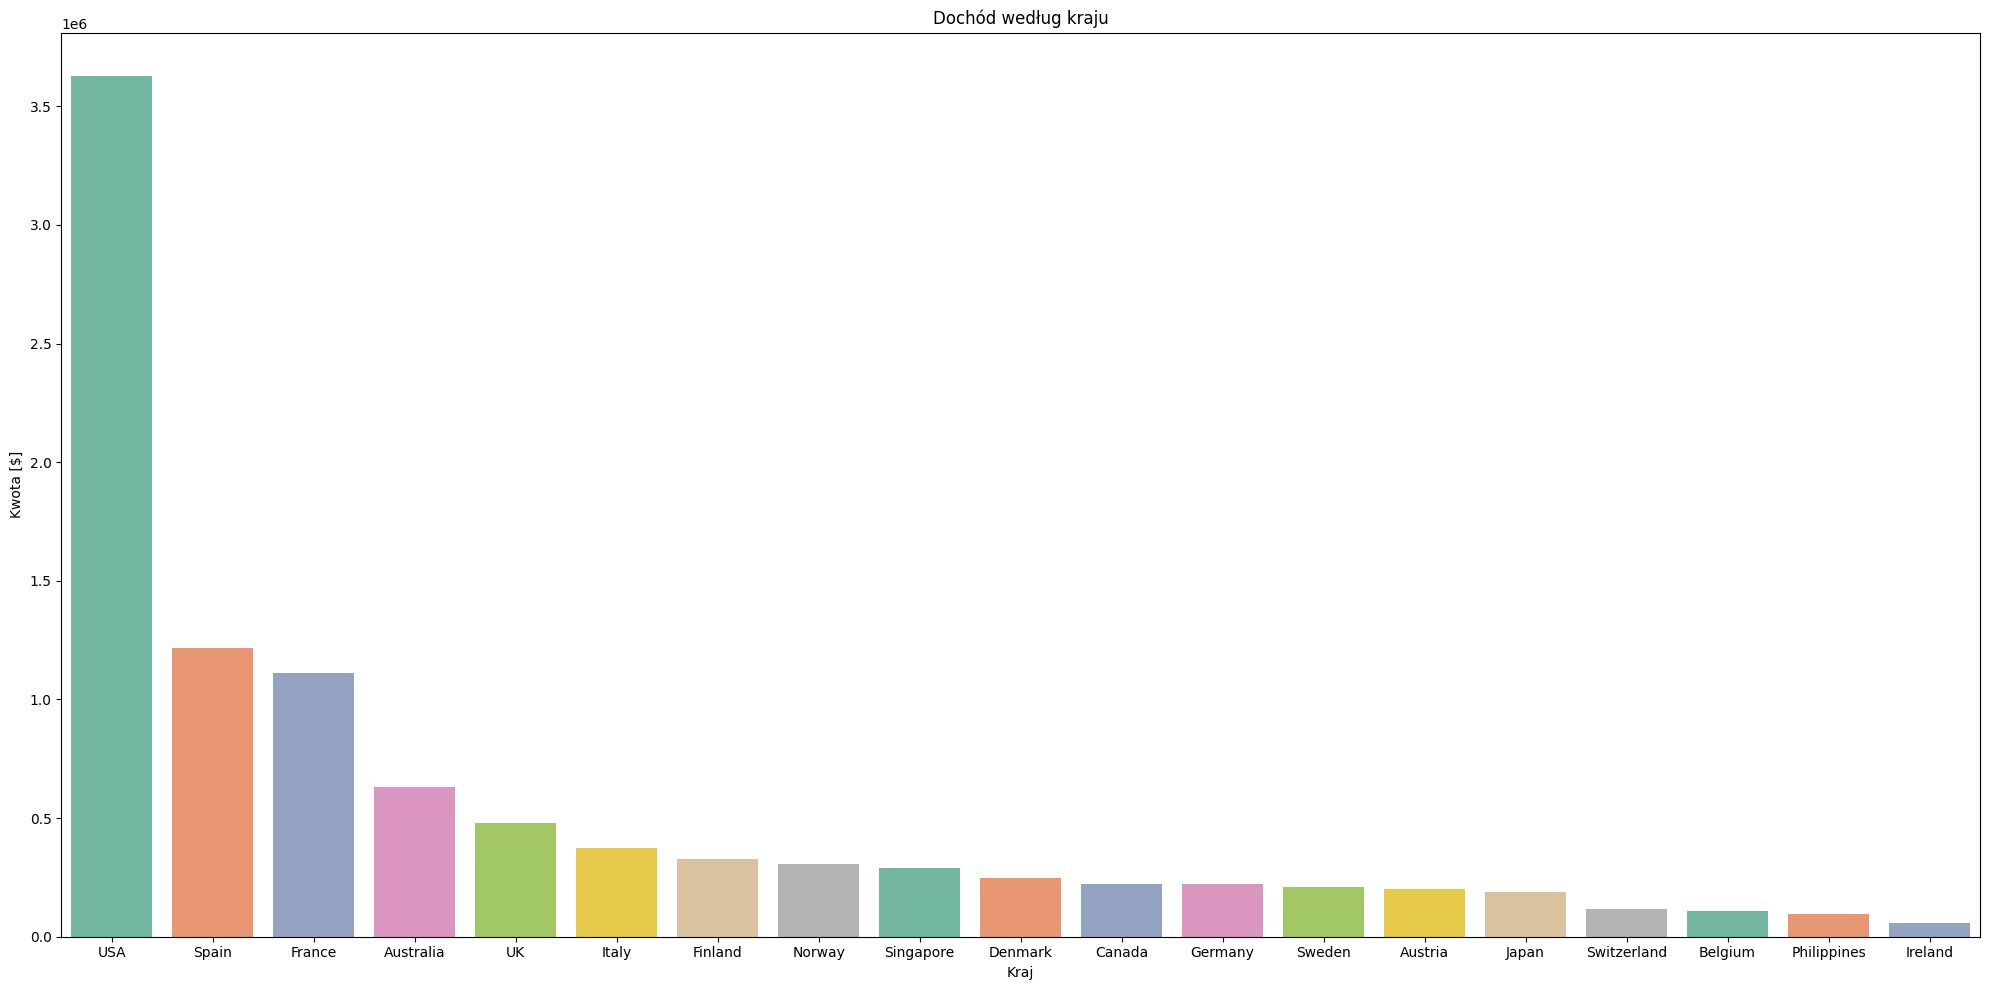

In [380]:
plt.figure(figsize=(20,10))
sns.barplot(data=country_sales, x = 'country', y = 'sales',palette='Set2')
plt.title('Dochód według kraju')
plt.ylabel('Kwota [$]')
plt.xlabel('Kraj')
plt.tight_layout()
plt.xticks(fontsize= 10)

Odp: Krajem, który wygenerował największy dochód jest USA. Kolejnymi krajami są: Hiszpania, Francja, Australia oraz UK

### 5. Zrób wykres przedstawiający udział sprzedaży wg krajów. 


In [381]:
sales_pct = country_sales
sales_pct.head()

,country,sales
18,USA,3627982.83
14,Spain,1215686.92
6,France,1110916.52
0,Australia,630623.10
17,UK,478880.46


In [382]:
sales_pct['pct'] = round(sales_pct['sales']/ sales_pct['sales'].sum() * 100)
sales_pct.head()

,country,sales,pct
18,USA,3627982.83,36.0
14,Spain,1215686.92,12.0
6,France,1110916.52,11.0
0,Australia,630623.10,6.0
17,UK,478880.46,5.0


C:\Users\adria\AppData\Local\Temp\ipykernel_65920\1974098463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_pct, x = 'country', y = 'pct', palette='Set2')


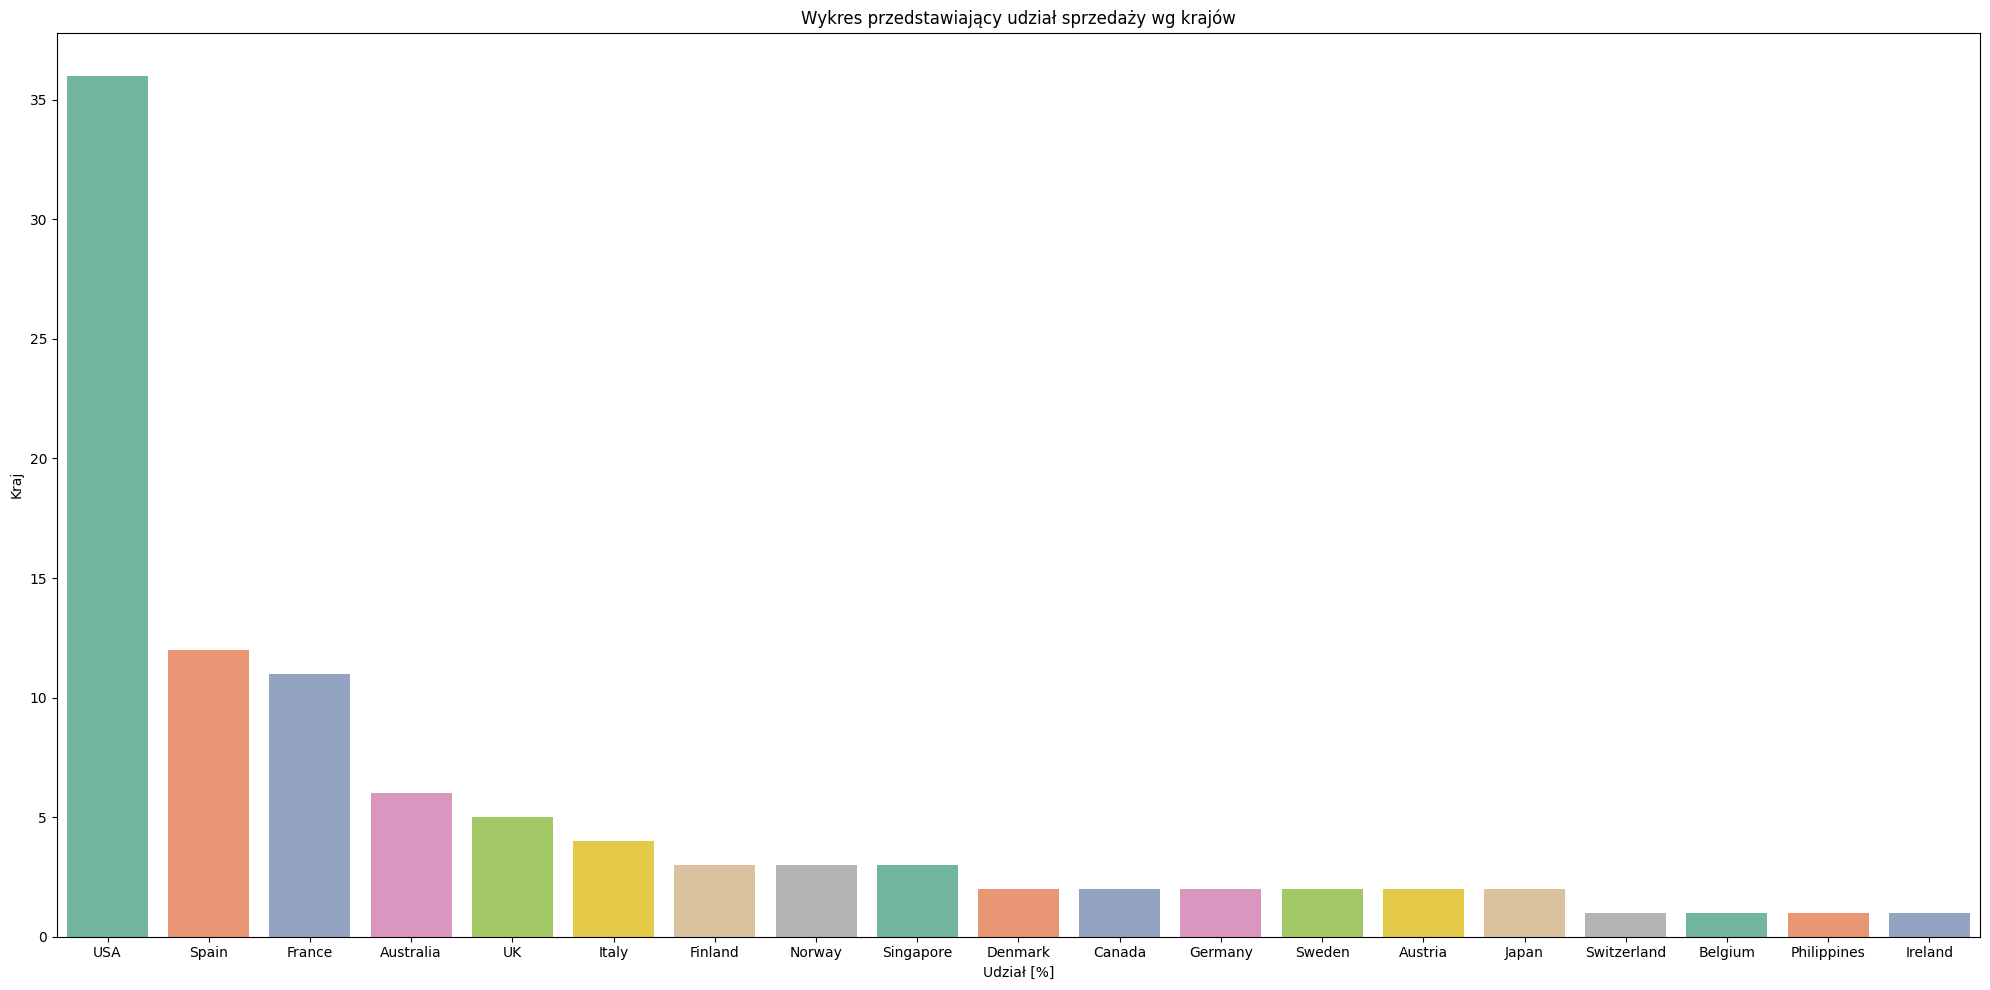

In [383]:
plt.figure(figsize=(20,10))
sns.barplot(data=sales_pct, x = 'country', y = 'pct', palette='Set2')
plt.title('Wykres przedstawiający udział sprzedaży wg krajów')
plt.xlabel('Udział [%]')
plt.ylabel('Kraj')
plt.tight_layout()



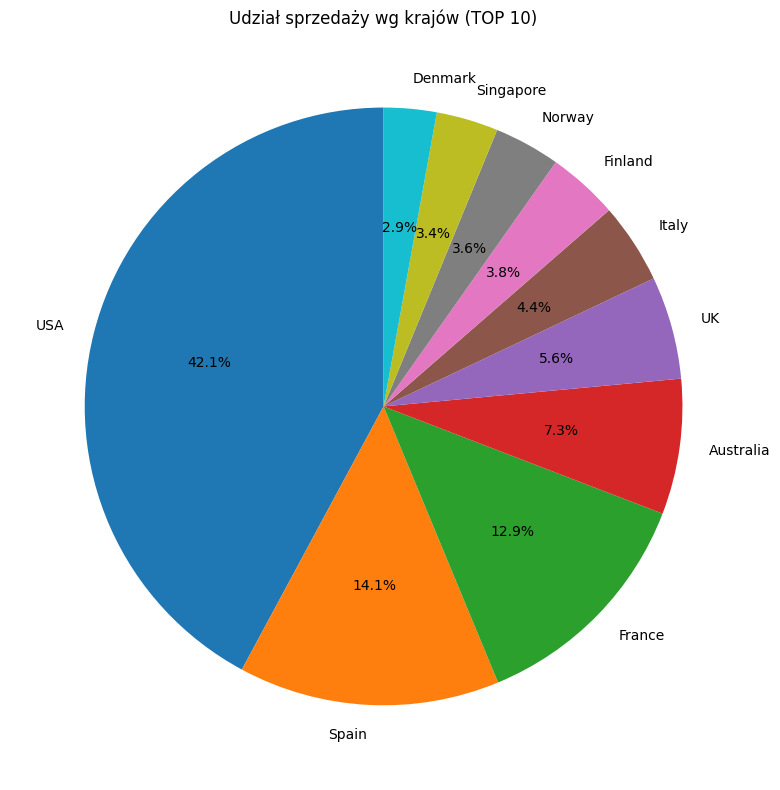

In [ ]:
plt.figure(figsize=(8, 8))
sales_pct.head(10).plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Udział sprzedaży wg krajów (TOP 10)')
plt.tight_layout()
plt.show()

### 6. Sporządź podsumowanie tekstowe (wnioski):
   - Kto był najlepszym klientem?
   - Jak wygląda sprzedaż między krajami?
   - Czy sprzedaż jest skoncentrowana czy rozproszona?

Zgodnie z przeprowadzoną analizą najlepszym klientem według całości obrotu jest - Euro Shopping Channel. Natomiast wiodącym krajem, który posiada ponad 42% udziału w sprzedaży jest USA. Sprzedaż jest skoncentrowana i ukierunkowana na USA oraz Europę.